# Plot the monthly number of searches for flights arriving ar Málaga, Madrid or Barcelon

For the arriving airport, you can use the Destination column in the searches file.

Plot a curve for Málaga,another one for Madrid, and another one for Barcelona, in the same figure. 

Curiosidades: cuando buscan en eDreams,kayak, etc Amadeus y otras compñañías les da datos, por lo que le cobran.

Además, a veces te cambia el precio, no porque alguien lo haya comprado, sino porque en funciónn de los datos de búsquedas, estos precios se actualizan. Este documento muestra esas búsquedas

## 1) Familiarizarse con datos

In [1]:
import pandas as pd

In [2]:
cd ~/Data/challenge

/home/dsc/Data/challenge


In [3]:
ls -alt

total 1018748
drwxr-x--- 2 dsc dsc      4096 ene 25 17:58 ./
-rwxrwxrwx 1 dsc dsc    244720 ene 25 17:20 searches_sample.csv.bz2*
-rwxrwxrwx 1 dsc dsc   4232732 ene 25 17:19 bookings_sample.csv*
-rwxrwxrwx 1 dsc dsc    535893 ene 25 17:19 bookings_sample.csv.bz2*
-rwxr-x--- 1 dsc dsc 483188920 mar 13  2018 searches.csv.bz2*
-rwxr-x--- 1 dsc dsc 554970628 mar 13  2018 bookings.csv.bz2*
drwxr-x--- 7 dsc dsc      4096 mar 13  2018 ../


In [4]:
searches = pd.read_csv('searches_sample.csv.bz2', sep='^')

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
searches.sample(5)

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
7858,2013-01-08,16:53:19,MPT,38a3abb0a28e3f00fa79a11f552a5052,FR,AMM,DXB,0,1,AMM,DXB,2013-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,PAR
6204,2013-01-07,12:24:28,CAL,6adef9150c342a50b3e720e6b5220493,CN,PVG,LAX,1,2,PVG,LAX,2013-08-04,8W,NaN,LAX,PVG,2013-09-04,8W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,BJS
718,2013-01-01,15:26:35,MPT,a0c51f4624ec7097619d82665556485c,FR,PAR,PTP,1,2,PAR,PTP,2013-02-02,NaN,NaN,PTP,PAR,2013-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,PAR
2301,2013-01-03,11:40:05,CAL,7d1b8aaaece6948713d06ae01f43ccf8,AE,AUH,CCJ,1,2,AUH,CCJ,2013-04-04,OJ,NaN,CCJ,AUH,2013-04-21,OJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,AAN
3866,2013-01-04,14:37:10,MPT,2e56b59f0e92016b3896e24942e8f2a3,IN,BAH,COK,0,1,BAH,COK,2013-02-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,DEL


- RoundTrip: ida y vuelta
- NbSegements: si es vuelo directo es uno, si es con una escala 2, etc.
- Por cada segemento tiene lugar de salida,de llegada, la fecha, la compañía y el booking code que no sabe lo que es
- fecha y hora son de la búsqueda

In [7]:
searches.describe()

,RoundTrip,NbSegments,IsPublishedForNeg,IsFromInternet,IsFromVista
count,9999.000000,9999.000000,9999.0,9999.0,9999.0
mean,0.700670,1.833583,0.0,0.0,0.0
std,0.457987,0.731857,0.0,0.0,0.0
min,0.000000,1.000000,0.0,0.0,0.0
25%,0.000000,1.000000,0.0,0.0,0.0
50%,1.000000,2.000000,0.0,0.0,0.0
75%,1.000000,2.000000,0.0,0.0,0.0
max,1.000000,9.000000,0.0,0.0,0.0


- Por ejemplo vemos que alguno tiene 9 segementos, por lo que hay segementos que no están modelados 

In [8]:
searches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 45 columns):
Date                 9999 non-null object
Time                 9999 non-null object
TxnCode              9999 non-null object
OfficeID             9999 non-null object
Country              9999 non-null object
Origin               9999 non-null object
Destination          9999 non-null object
RoundTrip            9999 non-null int64
NbSegments           9999 non-null int64
Seg1Departure        9999 non-null object
Seg1Arrival          9999 non-null object
Seg1Date             9972 non-null object
Seg1Carrier          4047 non-null object
Seg1BookingCode      1143 non-null object
Seg2Departure        7195 non-null object
Seg2Arrival          7195 non-null object
Seg2Date             7160 non-null object
Seg2Carrier          2870 non-null object
Seg2BookingCode      998 non-null object
Seg3Departure        534 non-null object
Seg3Arrival          534 non-null object
Seg3Date        

In [9]:
searches.shape

(9999, 45)

In [10]:
list(searches.columns)

['Date',
 'Time',
 'TxnCode',
 'OfficeID',
 'Country',
 'Origin',
 'Destination',
 'RoundTrip',
 'NbSegments',
 'Seg1Departure',
 'Seg1Arrival',
 'Seg1Date',
 'Seg1Carrier',
 'Seg1BookingCode',
 'Seg2Departure',
 'Seg2Arrival',
 'Seg2Date',
 'Seg2Carrier',
 'Seg2BookingCode',
 'Seg3Departure',
 'Seg3Arrival',
 'Seg3Date',
 'Seg3Carrier',
 'Seg3BookingCode',
 'Seg4Departure',
 'Seg4Arrival',
 'Seg4Date',
 'Seg4Carrier',
 'Seg4BookingCode',
 'Seg5Departure',
 'Seg5Arrival',
 'Seg5Date',
 'Seg5Carrier',
 'Seg5BookingCode',
 'Seg6Departure',
 'Seg6Arrival',
 'Seg6Date',
 'Seg6Carrier',
 'Seg6BookingCode',
 'From',
 'IsPublishedForNeg',
 'IsFromInternet',
 'IsFromVista',
 'TerminalID',
 'InternetOffice']

#### Idea JL: podríamos hacer una función en python que haga todo eso? 

## 2) Seleccionar las columnas de interés.

Date, Destination

In [11]:
searches = pd.read_csv('searches_sample.csv.bz2', sep='^', usecols=['Date', 'Destination'])

In [12]:
searches.head()

,Date,Destination
0,2013-01-01,AUH
1,2013-01-01,MIL
2,2013-01-01,SFO
3,2013-01-01,ARN
4,2013-01-01,MAD


### 3) Tratar Nan

In [13]:
searches = searches.dropna()

### 4) Trazar un plan

- Filtrar primero por solo tres aeropuertos MAD,AGP,BCN para simplificar el problema
- Crear columna "year-moth".
- Agrupar por aeropuertos y year-month
- Sumar búsquedas. 
- Pintar



### 5) Llevarlo a cabo

### Filtrar primero por solo tres aeropuertos MAD,AGP,BCN para simplificar el problema

In [14]:
def filterAirport(destination):
    if(destination == 'MAD'): return True
    if(destination == 'AGP'): return True
    if(destination == 'BCN'): return True
    
    return False

In [15]:
filtered = searches[searches['Destination'].apply(filterAirport)]

_Nota_: Otras formas:

In [16]:
searches[ (searches['Destination'] == 'MAD') | (searches['Destination']== 'AGP') | (searches['Destination']== 'BCN') ].head()

,Date,Destination
4,2013-01-01,MAD
93,2013-01-01,AGP
113,2013-01-01,BCN
147,2013-01-01,AGP
151,2013-01-01,MAD


In [17]:
searches[searches['Destination'].isin(['MAD', 'AGP', 'BCN'])].head()

,Date,Destination
4,2013-01-01,MAD
93,2013-01-01,AGP
113,2013-01-01,BCN
147,2013-01-01,AGP
151,2013-01-01,MAD


Miramos los datos

In [18]:
filtered.sample(10)

,Date,Destination
242,2013-01-01,AGP
688,2013-01-01,MAD
8395,2013-01-09,MAD
186,2013-01-01,BCN
5770,2013-01-06,MAD
618,2013-01-01,BCN
3260,2013-01-04,BCN
5409,2013-01-06,AGP
5516,2013-01-06,BCN
9645,2013-01-10,AGP


Comprobamos que solo haya tres destinos

In [19]:
filtered.describe()

,Date,Destination
count,335,335
unique,10,3
top,2013-01-01,BCN
freq,44,162


### Crear columna "year-moth".

Lo más cómo es lo siguiente: 

In [20]:
searches = pd.read_csv('searches_sample.csv.bz2', sep='^', usecols=['Date', 'Destination'], parse_dates=['Date'])
searches.dropna()
searches =searches[searches['Destination'].apply(filterAirport)]


In [21]:
searches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335 entries, 4 to 9950
Data columns (total 2 columns):
Date           335 non-null datetime64[ns]
Destination    335 non-null object
dtypes: datetime64[ns](1), object(1)
memory usage: 7.9+ KB


Sin embargo, a él le pasó que Pandas no lo hacía bien pero no se quejaba. Isra tocó datos para que le fallara. 

In [22]:
searches['Date'].iloc[0]

Timestamp('2013-01-01 00:00:00')

Estome saca la fecha del primer elemnento. Útil el *iloc*

Para sacarel mes:

In [23]:
searches['Date'].iloc[0].month

1

Otra opción: usar una función por cada elemento. Pandas tiene una to datetime

In [24]:
searches = pd.read_csv('searches_sample.csv.bz2', sep='^', usecols=['Date', 'Destination'])
searches.dropna()
searches =searches[searches['Destination'].apply(filterAirport)]

TO DO

Otra opción, más comoda: agrupamos por las primeras 7 letrass de la fecha

In [25]:
searches = pd.read_csv('searches_sample.csv.bz2', sep='^', usecols=['Date', 'Destination'])
searches.dropna()
searches =searches[searches['Destination'].apply(filterAirport)]

In [26]:
searches['Year-Month'] = searches['Date'].str[:7]
searches.head()

,Date,Destination,Year-Month
4,2013-01-01,MAD,2013-01
93,2013-01-01,AGP,2013-01
113,2013-01-01,BCN,2013-01
147,2013-01-01,AGP,2013-01
151,2013-01-01,MAD,2013-01


In [27]:
del searches['Date']

### Agrupar por aeropuertos y year-month

In [28]:
searches = pd.read_csv('searches_sample.csv.bz2', sep='^', usecols=['Date', 'Destination'])
searches.dropna()
searches =searches[searches['Destination'].apply(filterAirport)]
searches['Year-Month'] = searches['Date'].str[:7]
del searches['Date']
searches.head()

,Destination,Year-Month
4,MAD,2013-01
93,AGP,2013-01
113,BCN,2013-01
147,AGP,2013-01
151,MAD,2013-01


In [29]:
group = searches.groupby(['Destination', 'Year-Month'])

Para ver todas las claves:

In [30]:
group.count()



,
Destination,Year-Month
AGP,2013-01
BCN,2013-01
MAD,2013-01


Para ver los tamaños de cada grupo

In [31]:
group.size()

Destination  Year-Month
AGP          2013-01        48
BCN          2013-01       162
MAD          2013-01       125
dtype: int64

### Sumar búsquedas.

In [32]:
searches = pd.read_csv('searches_sample.csv.bz2', sep='^', usecols=['Date', 'Destination'])
searches.dropna()
searches =searches[searches['Destination'].apply(filterAirport)]
searches['Year-Month'] = searches['Date'].str[:7]
del searches['Date']
searches['Searches']=1
group = searches.groupby(['Destination', 'Year-Month'])
group.count().reset_index()

,Destination,Year-Month,Searches
0,AGP,2013-01,48
1,BCN,2013-01,162
2,MAD,2013-01,125


Mi opción, que creo que es más limpia

In [33]:
searches = pd.read_csv('searches_sample.csv.bz2', sep='^', usecols=['Date', 'Destination'])
searches.dropna()
searches =searches[searches['Destination'].apply(filterAirport)]
searches['Year-Month'] = searches['Date'].str[:7]
del searches['Date']
group = searches.groupby(['Destination', 'Year-Month'])
group.size().reset_index()

,Destination,Year-Month,0
0,AGP,2013-01,48
1,BCN,2013-01,162
2,MAD,2013-01,125


Vamos a hacerlo con más líneas , lyendo del grande

In [34]:
searches = pd.read_csv('searches.csv.bz2', sep='^', usecols=['Date', 'Destination'], nrows=100000)
searches.dropna()
searches =searches[searches['Destination'].apply(filterAirport)]
searches['Year-Month'] = searches['Date'].str[:7]
del searches['Date']
searches['Searches']=1
group = searches.groupby(['Destination', 'Year-Month'])
group.count().reset_index()

,Destination,Year-Month,Searches
0,AGP,2013-01,169
1,AGP,2013-02,147
2,AGP,2013-03,187
3,AGP,2013-04,31
4,BCN,2013-01,517
5,BCN,2013-02,497
6,BCN,2013-03,536
7,BCN,2013-04,174
8,MAD,2013-01,425
9,MAD,2013-02,400


##### Idea JL: Hacer como una especia de sample para ficheros

### Plotearlo

In [35]:
searches = pd.read_csv('searches.csv.bz2', sep='^', usecols=['Date', 'Destination'], nrows=100000)
searches.dropna()
searches =searches[searches['Destination'].apply(filterAirport)]
searches['Year-Month'] = searches['Date'].str[:7]
del searches['Date']
searches['Searches']=1
group = searches.groupby(['Destination', 'Year-Month'])
group = group.count().reset_index()
group

,Destination,Year-Month,Searches
0,AGP,2013-01,169
1,AGP,2013-02,147
2,AGP,2013-03,187
3,AGP,2013-04,31
4,BCN,2013-01,517
5,BCN,2013-02,497
6,BCN,2013-03,536
7,BCN,2013-04,174
8,MAD,2013-01,425
9,MAD,2013-02,400


In [36]:
import matplotlib.pyplot as pt

In [37]:
pivotado = group.pivot("Year-Month", "Destination", "Searches")

Ese pivot lo que te hace es ponerte Year-Mothn en abscisas, Destinatio en ordenadas y tantas series como searches

In [38]:
print(pivotado)

Destination  AGP  BCN  MAD
Year-Month                
2013-01      169  517  425
2013-02      147  497  400
2013-03      187  536  433
2013-04       31  174  147


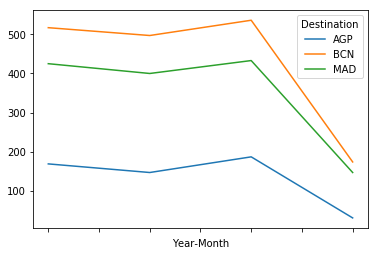

In [39]:
pivotado.plot()

Ojo: aunque llame a una fución de pandas, necesito haverme importado matplotlib

Otra opción, que muestra mejor las abscisas pero por defecto no muestra leyenda:

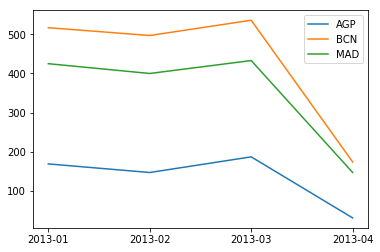

In [40]:
pt.plot(pivotado)
pt.legend(pivotado.columns)

## 6) Ajustar código para trabajar con big data. 

Vamos a usar chunksize para leer trocito a trocito (chunk by chinck) el fichero, porque, si no, nos quedamos sin memoria

In [46]:
chunks = pd.read_csv('searches.csv.bz2', sep='^', usecols=['Date', 'Destination'],nrows=100000, chunksize=1000)

grupo_acumulado = pd.DataFrame() # creao una data frame vacía

for index, chunk in enumerate(chunks):
    searches = chunk
    searches.dropna()
    searches =searches[searches['Destination'].apply(filterAirport)]
    searches['Year-Month'] = searches['Date'].str[:7]
    del searches['Date']
    searches['Searches']=1
    group = searches.groupby(['Destination', 'Year-Month'])
    group = group.count().reset_index()
    grupo_acumulado = grupo_acumulado.append(group) 
    
grupo_acumulado
    


/home/dsc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/dsc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,Destination,Year-Month,Searches
0,AGP,2013-01,7
1,BCN,2013-01,26
2,MAD,2013-01,11
0,AGP,2013-01,4
1,BCN,2013-01,9
2,MAD,2013-01,11
0,AGP,2013-01,5
1,BCN,2013-01,13
2,MAD,2013-01,5
0,AGP,2013-01,5


 Hemos ido haciendo append,lo cual podrá hacer que tengamos de nuevo filas repetidas con mes y destino tenemos que reagrupar

In [52]:
reagrupado = grupo_acumulado.groupby(['Destination', 'Year-Month']).sum()
reagrupado

Searches
Destination Year-Month          
AGP         2013-01          169
            2013-02          147
            2013-03          187
            2013-04           31
BCN         2013-01          517
            2013-02          497
            2013-03          536
            2013-04          174
MAD         2013-01          425
            2013-02          400
            2013-03          433
            2013-04          147

Esto nos ha creado un multiindex: lo resetamos

In [53]:
reagrupado = reagrupado.reset_index()
reagrupado

,Destination,Year-Month,Searches
0,AGP,2013-01,169
1,AGP,2013-02,147
2,AGP,2013-03,187
3,AGP,2013-04,31
4,BCN,2013-01,517
5,BCN,2013-02,497
6,BCN,2013-03,536
7,BCN,2013-04,174
8,MAD,2013-01,425
9,MAD,2013-02,400


Pintamos

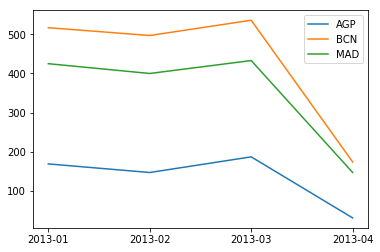

In [54]:
pivotado = reagrupado.pivot("Year-Month", "Destination", "Searches")
pt.plot(pivotado)
pt.legend(pivotado.columns)

## 7) Probar con el fichero real:

In [56]:
def plotSearches():
    chunks = pd.read_csv('searches.csv.bz2', sep='^', usecols=['Date', 'Destination'],chunksize=300000)

    grupo_acumulado = pd.DataFrame() # creao una data frame vacía

    for index, chunk in enumerate(chunks):
        print(index)
        searches = chunk
        searches.dropna()
        searches =searches[searches['Destination'].apply(filterAirport)]
        searches['Year-Month'] = searches['Date'].str[:7]
        del searches['Date']
        searches['Searches']=1
        group = searches.groupby(['Destination', 'Year-Month'])
        group = group.count().reset_index()
        grupo_acumulado = grupo_acumulado.append(group)   

    reagrupado = grupo_acumulado.groupby(['Destination', 'Year-Month']).sum() 
    reagrupado = reagrupado.reset_index()

    pivotado = reagrupado.pivot("Year-Month", "Destination", "Searches")
    pt.plot(pivotado)
    pt.legend(pivotado.columns)

0


/home/dsc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/dsc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67


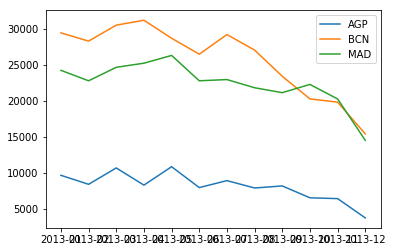

In [57]:
plotSearches()